In [1]:
df = read.csv("ORproject_customer_data.csv",sep="\t")
# df2=read.csv("ORproject_arrival_times.csv",sep="\t")

In [2]:
head(df)

,observation_id,observer,date,que_length_on_entry,time_of_entry,time_of_order,time_of_service_end,hot_drink,breakfast_roll,pastry_cake_sandwich,cold_drink,other_hot_food
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,5,Joel,03/11/2023,1,08:32:20,08:32:40,08:33:53,1,1,0,0,0
2,6,Joel,03/11/2023,4,08:41:15,08:43:10,08:43:38,0,0,2,0,0
3,7,Joel,03/11/2023,0,08:47:17,08:47:17,08:50:18,0,0,0,1,1
4,8,Joel,03/11/2023,2,08:50:50,08:51:25,08:51:40,0,0,1,0,0
5,9,Joel,03/11/2023,6,08:54:28,08:55:30,08:57:00,1,0,1,0,0
6,10,Joel,03/11/2023,1,08:59:51,09:00:00,09:00:20,0,0,1,1,0


In [ ]:
# information about the data
# the data was collected from a food shop
# observer - person who took the observation
# date - date on which the data was taken
# que_length_on_entry - length of the queue when the observed person entered the shop
# time_of_entry - time at which the the observed person entered the shop
# time_of_order - time at which the observed person ordered
# time_of_service_end - time at which the observed person was served
# hot_drink - amount of hot drink/s the observed person ordered, this was usually 0 or 1 
# breakfast_roll - amount of breakfast roll/s the observed person ordered, this was usually 0 or 1 
# pastry_cake_sandwich - amount of hot drink the observed person ordered, this was usually 0 or 1 
# cold_drink - amount of hot drink the observed person ordered, this was usually 0 or 1 
# other_hot_food - amount of hot drink the observed person ordered, this was usually 0 or 1 

In [3]:
# convert time into seconds
time_of_entry <- sapply(strsplit(df$time_of_entry, ":"), function(x) as.numeric(x[1]) * 3600 + as.numeric(x[2]) * 60 + as.numeric(x[3]))
time_of_order <- sapply(strsplit(df$time_of_order, ":"), function(x) as.numeric(x[1]) * 3600 + as.numeric(x[2]) * 60 + as.numeric(x[3]))
time_of_service_end <- sapply(strsplit(df$time_of_service_end, ":"), function(x) as.numeric(x[1]) * 3600 + as.numeric(x[2]) * 60 + as.numeric(x[3]))
# calculate the seconds spend while in queue and while waiting after giving the order
que_time <- time_of_order - time_of_entry 
wait_time <- time_of_service_end - time_of_order                              
# add these to the data frame
df$wait_time <- wait_time
df$que_time <- que_time

In [4]:
# take out hour from time of order
hour_of_day <- sapply(strsplit(df$time_of_order, ":"), function(x) as.numeric(x[1]))
df$hour_of_day <- hour_of_day
df$hour_of_day_str <- sapply(df$hour_of_day, function(x) paste(as.character(x), "00:00", sep=":")) 
# table showing peak and off peak hours
print(table(hour_of_day))
# do aggregations, group by hour_of_day                              
mean_que_time_perhour <- aggregate(que_time ~ hour_of_day, FUN = mean)
mean_wait_time_perhour <- aggregate(wait_time ~ hour_of_day, FUN = mean)
# Concatenate the two columns into a new column named datetime
df$date_hour <- paste(df$date, df$hour_of_day_str)
# Print the updated data frame
aggregate(que_time~df$date_hour, FUN= mean)
print(mean_que_time_perhour)
print(mean_wait_time_perhour)                               

hour_of_day
 8  9 10 
14 46 12 


df$date_hour,que_time
<chr>,<dbl>
03/11/2023 8:00:00,46.40000
03/11/2023 9:00:00,27.05556
10/11/2023 9:00:00,61.06250
13/11/2023 10:00:00,150.33333
13/11/2023 8:00:00,75.33333
13/11/2023 9:00:00,64.83333


  hour_of_day  que_time
1           8  65.00000
2           9  48.73913
3          10 150.33333
  hour_of_day wait_time
1           8 101.92857
2           9  62.76087
3          10  48.00000


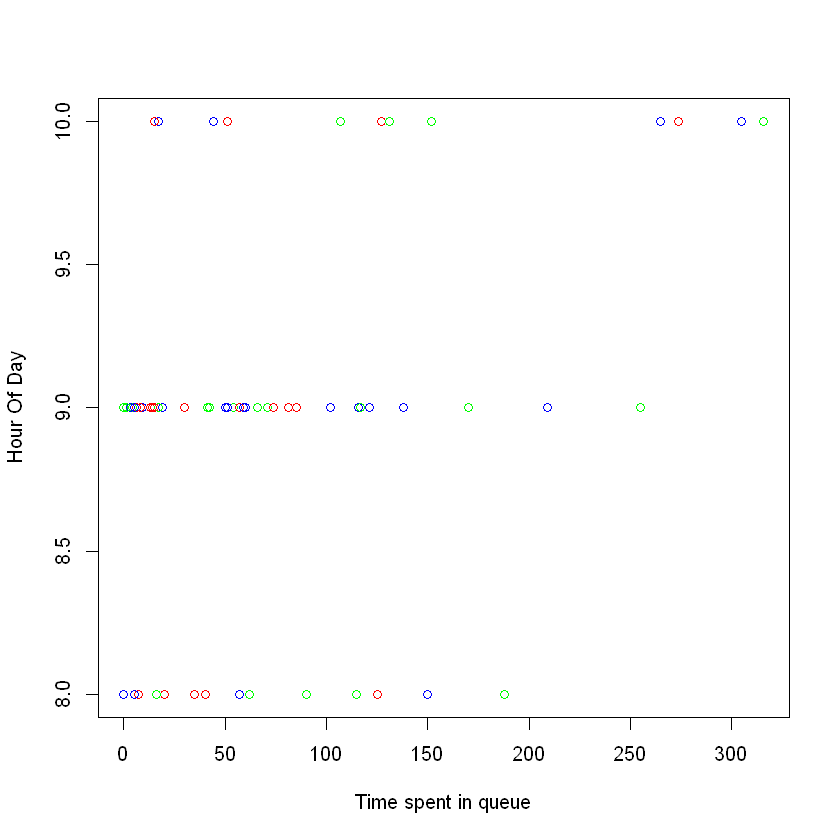

In [5]:
# plot peak time
plot(df$hour_of_day~df$que_time, xlab="Time spent in queue",ylab="Hour Of Day",col=c("red","green","blue"))

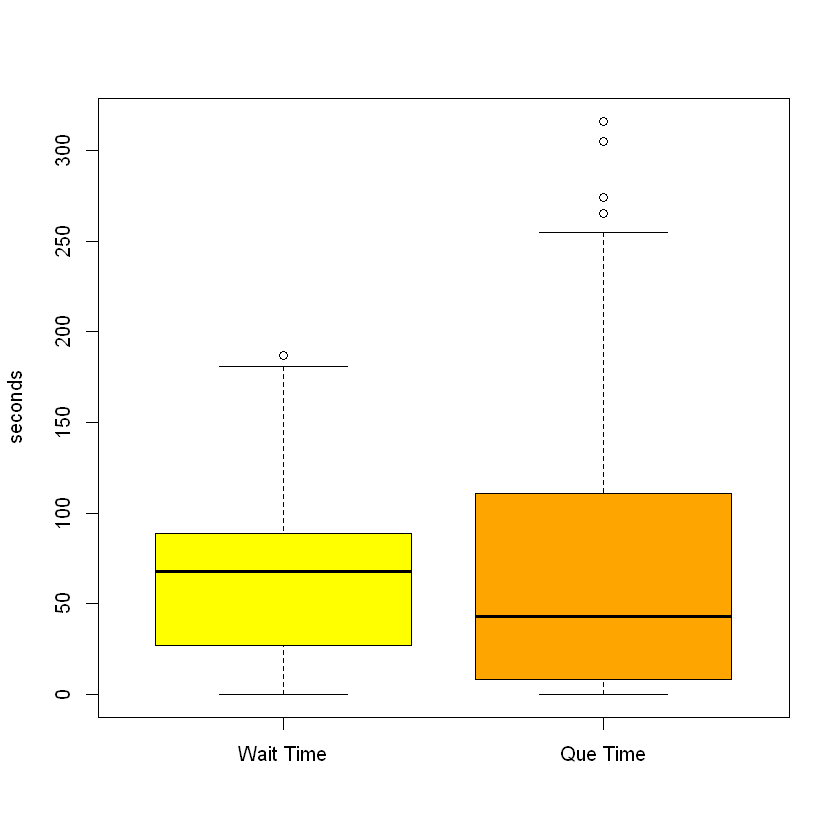

In [6]:
# comparison of wait_time and que_time
boxplot(wait_time,que_time, names=c("Wait Time","Que Time"), ylab="seconds", col=c("yellow","orange"))                              

In [7]:
total_time_spent_in_queue <- sum(que_time)
total_que_lengths <- sum(df$que_length_on_entry)
ratio_quetime_quelength <- total_time_spent_in_queue/total_que_lengths
sprintf("Average time spent per que step %.3f",ratio_quetime_quelength)
sprintf("Average queue size %.3f",mean(que_time)/ratio_quetime_quelength)
sprintf("Average time spent in queue %.3f",mean(que_time))

[1] "Average time spent per que step 22.839"

[1] "Average queue size 3.014"

[1] "Average time spent in queue 68.833"

In [8]:
sprintf("Average wait time %.3f", mean(wait_time))

[1] "Average wait time 67.917"

In [9]:
# deal with missing values, NA only present in coulumns which shows the amount of food bought
# using probability to approximate NA values
foods <- df[8:12]
probabilities <- function(x) {
    x <- x[(x>=0|x>=1) & !is.na(x)]
    x <- ifelse(x>=1,1,0)
    return (sum(x)/length(x))
}
prob1 = probabilities(foods[1])
foods[1][is.na(foods[1])] <- sample(c(0, 1), size = sum(is.na(foods[1])), prob = c(1 - prob1, prob1), replace = TRUE)

prob2 = probabilities(foods[2])
foods[2][is.na(foods[2])] <- sample(c(0, 1), size = sum(is.na(foods[2])), prob = c(1 - prob2, prob2), replace = TRUE)

prob3 = probabilities(foods[3])
foods[3][is.na(foods[5])] <- sample(c(0, 1), size = sum(is.na(foods[3])), prob = c(1 - prob3, prob3), replace = TRUE)

prob4 = probabilities(foods[4])
foods[4][is.na(foods[4])] <- sample(c(0, 1), size = sum(is.na(foods[4])), prob = c(1 - prob4, prob4), replace = TRUE)

prob5 = probabilities(foods[5])
foods[5][is.na(foods[5])] <- sample(c(0, 1), size = sum(is.na(foods[5])), prob = c(1 - prob5, prob5), replace = TRUE)

# binarize the filled data as we can assume that since only few values are above 1
foods[1][foods[1]>1] <- 1
foods[2][foods[2]>1] <- 1
foods[3][foods[3]>1] <- 1
foods[4][foods[4]>1] <- 1
foods[5][foods[5]>1] <- 1

Warning message:
"package 'corrplot' was built under R version 4.3.2"
corrplot 0.92 loaded



,cold_drink
hot_drink,-0.2835828


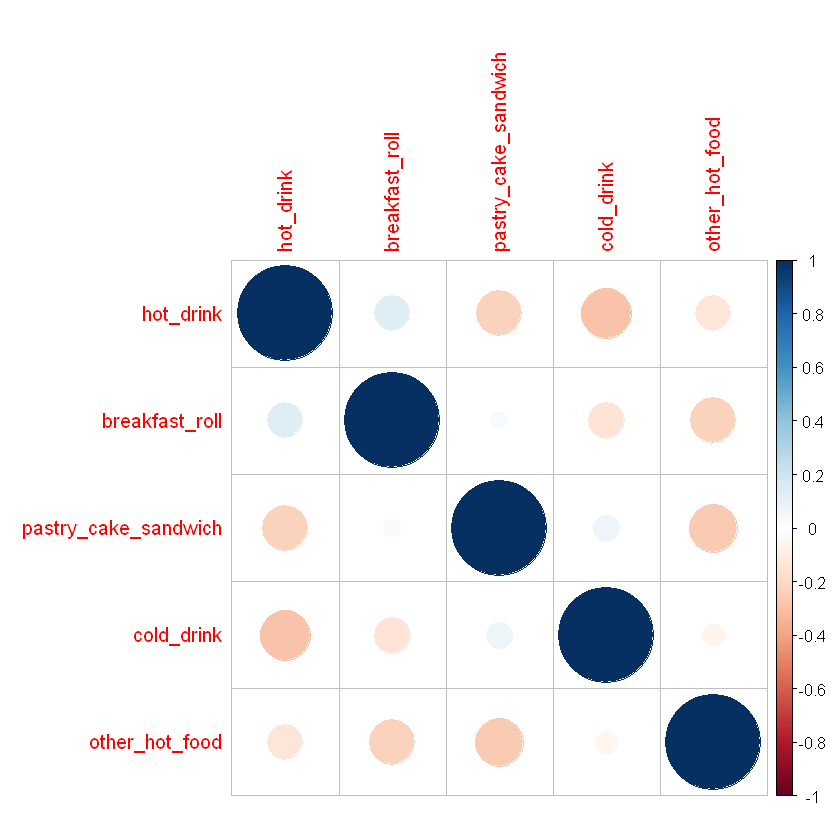

In [10]:
# correlations between food typesE
library(corrplot)
foodscor <- cor(foods)
corrplot(foodscor, method="circle")
# correlating between hot_drink and cold_drink
cor(foods[1],foods[4])

In [11]:
# correlation between time spent in queue and queue length
que_length_on_entry <- df$que_length_on_entry
print(cor(que_length_on_entry,que_time))

[1] 0.8700264


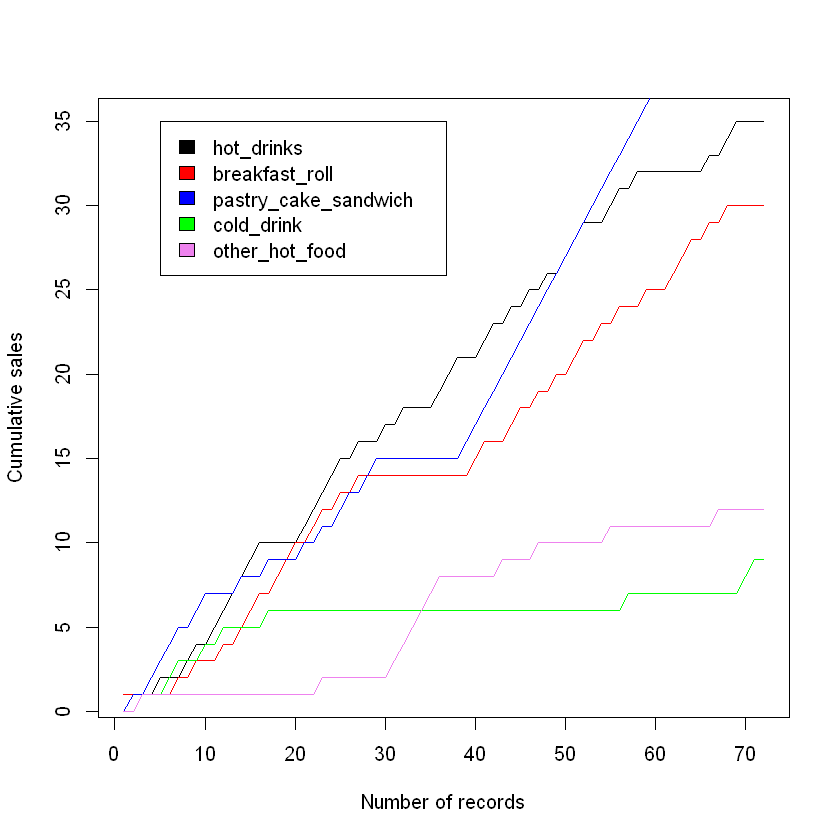

In [12]:
#cumsum of sale of foods after filling NA and binarization
chd <- cumsum(foods[1])
cbr <- cumsum(foods[2])
cpcs <- cumsum(foods[3])
ccd <- cumsum(foods[4])
cohf <- cumsum(foods[5])
plot(1:length(unlist(chd)), unlist(chd), xlab = "Number of records", ylab="Cumulative sales",type='l')
lines(cbr, col='red')
lines(cpcs, col='blue')
lines(ccd, col='green')
lines(cohf, col='violet')
legend(x=5, y=35, c("hot_drinks", "breakfast_roll", "pastry_cake_sandwich", "cold_drink","other_hot_food"), fill=c("black","red","blue","green","violet"))

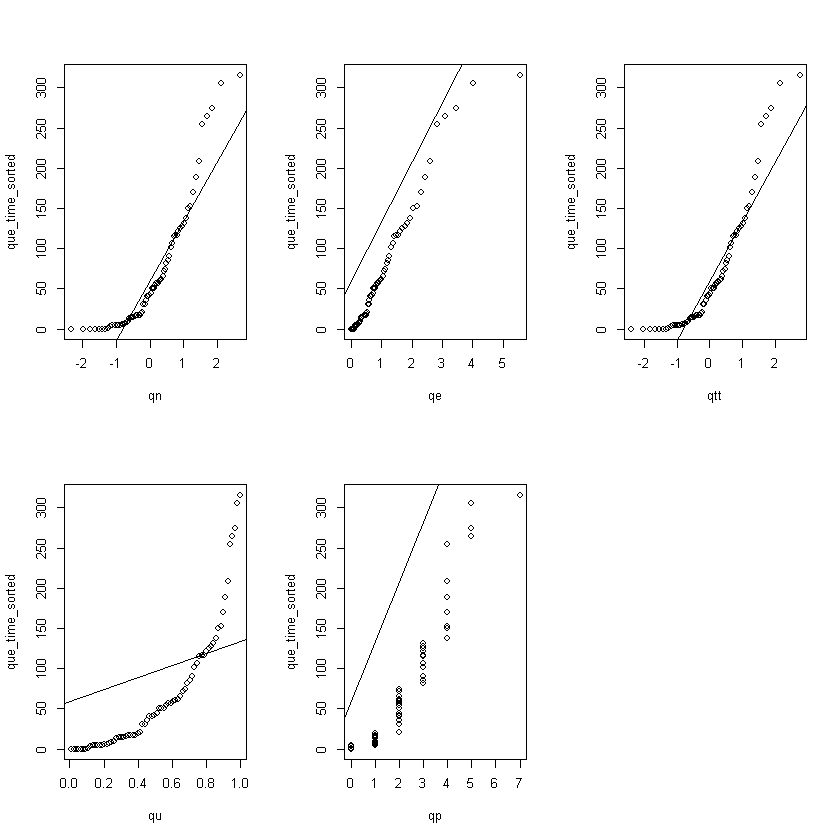

In [13]:
que_time_sorted = sort(que_time)
probabilities <- seq(0.01,1,b=1/length(que_time_sorted))

# check if wait_time follows normal, eponential, student, uniform or poisson distribution
qn <- qnorm(probabilities, mean=0,sd=1)
qe <- qexp(probabilities, rate = 1)
qtt <- qt(probabilities, df = length(que_time_sorted)-1)
qu <- qunif(probabilities, min=0,max=1)
qp <- qpois(probabilities, lambda=2)

par(mfrow = c(2, 3))
plot(qn,que_time_sorted)
qqline(que_time_sorted)
plot(qe,que_time_sorted)
qqline(que_time_sorted)
plot(qtt,que_time_sorted)
qqline(que_time_sorted)
plot(qu,que_time_sorted)
qqline(que_time_sorted)
plot(qp,que_time_sorted)
qqline(que_time_sorted)


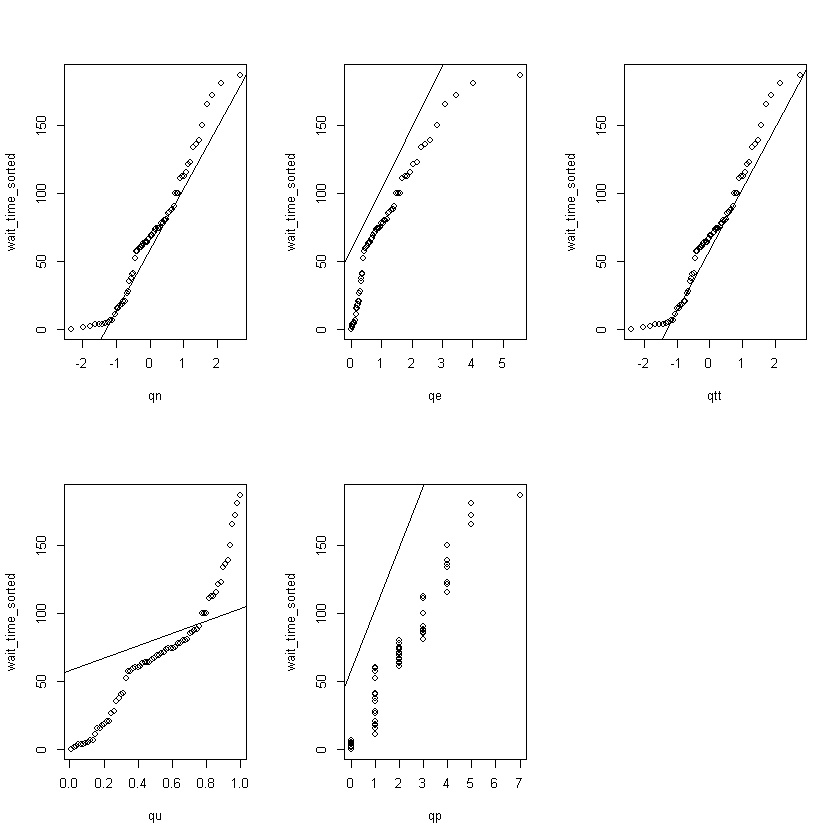

In [14]:
wait_time_sorted = sort(wait_time)
probabilities <- seq(0.01,1,b=1/length(wait_time))

# check if wait_time follows normal, eponential, student, uniform or poisson distribution
qn <- qnorm(probabilities, mean=0,sd=1)
qe <- qexp(probabilities, rate = 1)
qtt <- qt(probabilities, df = length(que_time_sorted)-1)
qu <- qunif(probabilities, min=0,max=1)
qp <- qpois(probabilities, lambda=2)

par(mfrow = c(2, 3))
plot(qn,wait_time_sorted)
qqline(wait_time_sorted)
plot(qe,wait_time_sorted)
qqline(wait_time_sorted)
plot(qtt,wait_time_sorted)
qqline(wait_time_sorted)
plot(qu,wait_time_sorted)
qqline(wait_time_sorted)
plot(qp,wait_time_sorted)
qqline(wait_time_sorted)
par(mfrow = c(1, 1))


[1] Binomial distribution

[1] True value: p = 0.48

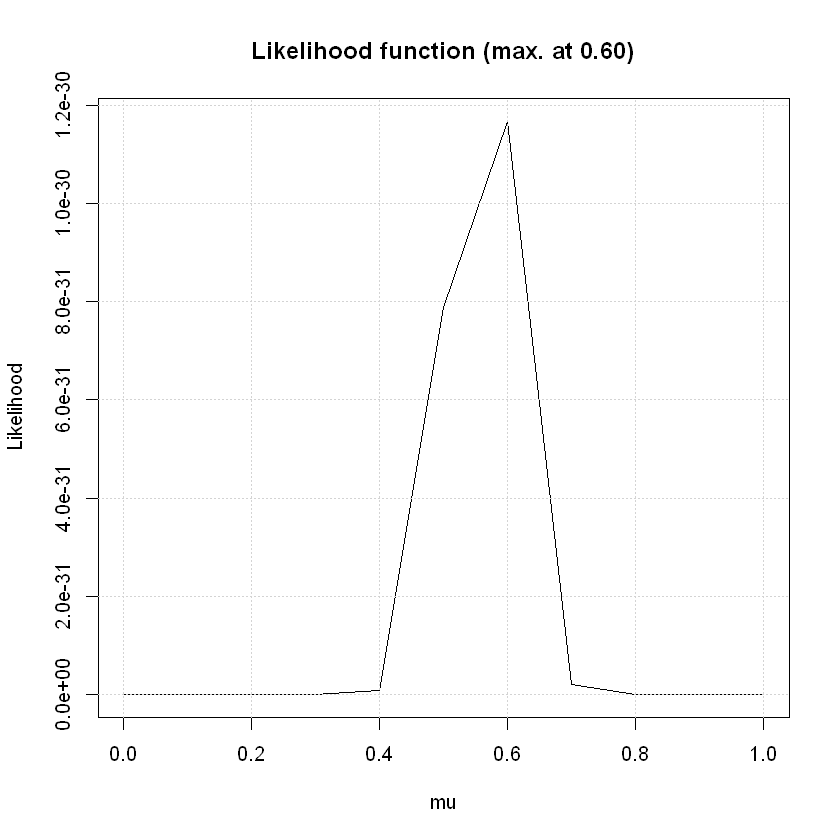

In [15]:
#likelihood of hot_drinks
nobs <- 100
noquote('Binomial distribution')
numtrials <- 1
psuccess <- prob1
noquote(sprintf('True value: p = %.2f', psuccess))
data <- rbinom(nobs, size=numtrials, prob=psuccess)
muvals = seq(0,1,0.1)

# Compute likelihood function for this sample realisation
likelihood <- rep(0, length(muvals))

for (idx in 1:length(muvals)) {
    # Binomial
    x = dbinom(data, size=numtrials, prob=muvals[idx])
    # print(x)
    likelihood[idx] <- prod(x)
    # print(likelihood)
}
# Plot likelihood function and maximum likelihood estimator
mle <- muvals[likelihood == max(likelihood)]
plot(muvals, likelihood, type='l', xlab='mu', ylab='Likelihood',
    main=sprintf('Likelihood function (max. at %.2f)', mle))
grid()


In [16]:
# Bias in and mean squared error in hot_drinks
nobs <- 50
bias <- matrix(0, nrow=nobs, ncol=2)
mse <- matrix(0, nrow=nobs, ncol=2)
mu <- mean(unlist(foods[1]))
for (rep in 1:nobs) {
    pts <- rbinom(nobs, size=1, prob=prob1)
    xbar <- mean(pts) # sample mean
    nest <- sum(pts)/(nobs+1) # new estimator
    bias[rep,] <- c(xbar - mu, nest - mu)
    mse[rep,]  <- c((xbar - mu)**2, (nest - mu)**2)
}
print(colMeans(bias))
print(colMeans(mse))

[1] -0.01211111 -0.02140523
[1] 0.004774679 0.004906473


In [17]:


# function to compute confidence interval
compute_ci <- function(nobs, conf=0.95){
    
    npts <- length(nobs)
    z_lower <- qnorm((1-conf)/2, 0, 1)
    z_upper <- qnorm(1-(1-conf)/2, 0, 1)
    
    xbar <- mean(nobs)
    sigma <- sd(nobs)    
    xz_lower <- xbar - z_upper * sigma/sqrt(npts)
    xz_upper <- xbar + z_upper * sigma/sqrt(npts)
    
    return(c(xz_lower, xz_upper))
}

# set parameters
nreps <-50
conf <- 0.95
xbar = mean(foods[,1])

intervals <- c()
for (rep in 1:nreps) {
    # using random values from binomial distribution instead of sample for sampling
    pts <- rbinom(30, size=1, p=prob1)
    # pts <- sample(foods[,1],size = 30, replace=TRUE)
    ci <- compute_ci(pts, conf)
    intervals <- rbind(intervals, ci) # inefficient
}

# record whether interval contains the mean
boo <- logical(nreps)
# print(boo)
for (rep in 1:nreps){
    boo[rep]<- (mu >= intervals[rep,1]) & (mu <= intervals[rep,2]) 
}


[1] theoretical confidence level  = 0.95

[1] experimental confidence level = 0.90

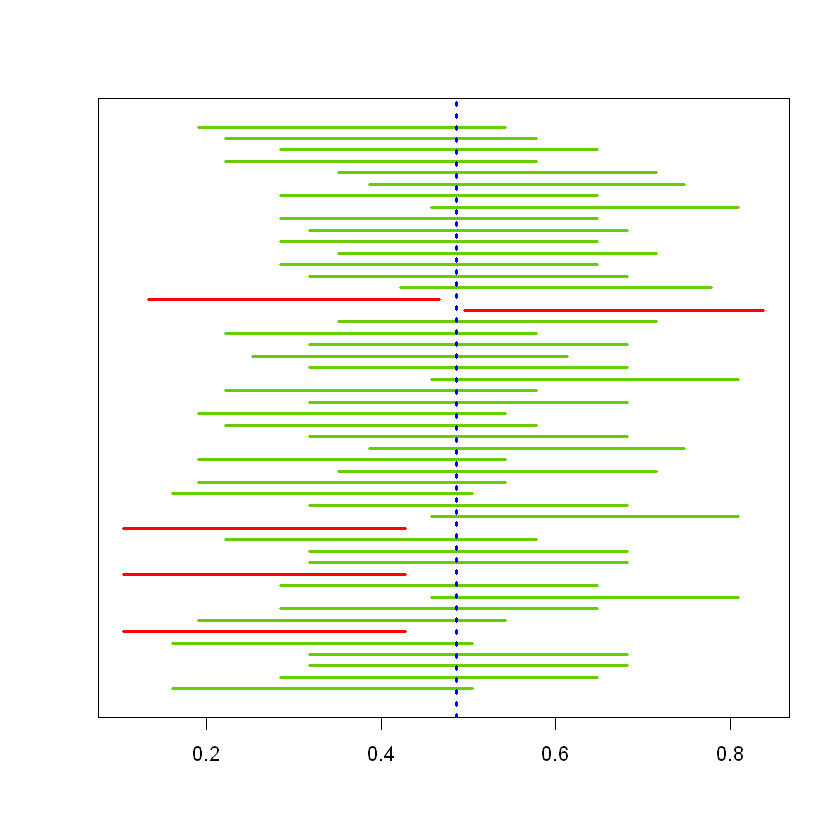

In [18]:
# info
noquote(sprintf('theoretical confidence level  = %.2f', conf))
noquote(sprintf('experimental confidence level = %.2f', sum(boo)/nreps))

# checking confidence interval of hot drinks
nplots <- 50
xlims <- c(min(intervals[1:nplots,1]), max(intervals[1:nplots,2]))
plot(c(), xlim=xlims, ylim=c(0.5, nplots+0.5), yaxt='none', xlab='', ylab='')
for (rep in 1:nreps) {
    lines(intervals[rep,], c(rep,rep), lwd=3, col=c('red','chartreuse3')[boo[rep]+1])
}
abline(v=mu, lty=3, lwd=3, col='blue')

In [19]:
# actual mean is well within the confidence interval 

In [20]:
# Define function to compute confidence interval for a mean for left tail
compute_ci_leq <- function(pts, conf=0.95){

    npts <- length(pts)
    t_val <- qt(1-conf, df=npts-1)

    xbar <- mean(pts)
    s <- sd(pts)
    xt_val <- xbar - t_val * s/sqrt(npts)

    return(xt_val)
}

In [21]:
# Monte Carlo experiment to test H0: mew=60 and H1: mew < .60 
# Test types:
test_type = "leq"

# set parameters
# npts <- 20
# mu <- 0
mu <- mean(foods[,1])
# sigma <- 1
conf <- 0.95

# set expt parameters
nreps <-50

# repeat
intervals <- c()
for (rep in 1:nreps) {
    # pts <- rnorm(npts, mean=mu, sd=sigma)
    # pts <- sample(que_time, size=30, replace = TRUE)
    pts <- rbinom(30,1,p=mu)
    # print(pts)
    ci <- compute_ci_leq(pts, conf)    
    intervals <- rbind(intervals, ci) # inefficient
}

In [22]:
# Set the value of mu_0 in the hypothesis test.
mu_0 <- .60

# record the outcome of each test
test_outcomes <- c(1:nreps)
for (rep in 1:nreps){
    test_outcomes[rep] <- 1 + (mu_0 > intervals[rep]) + 2*(mu < mu_0)
}


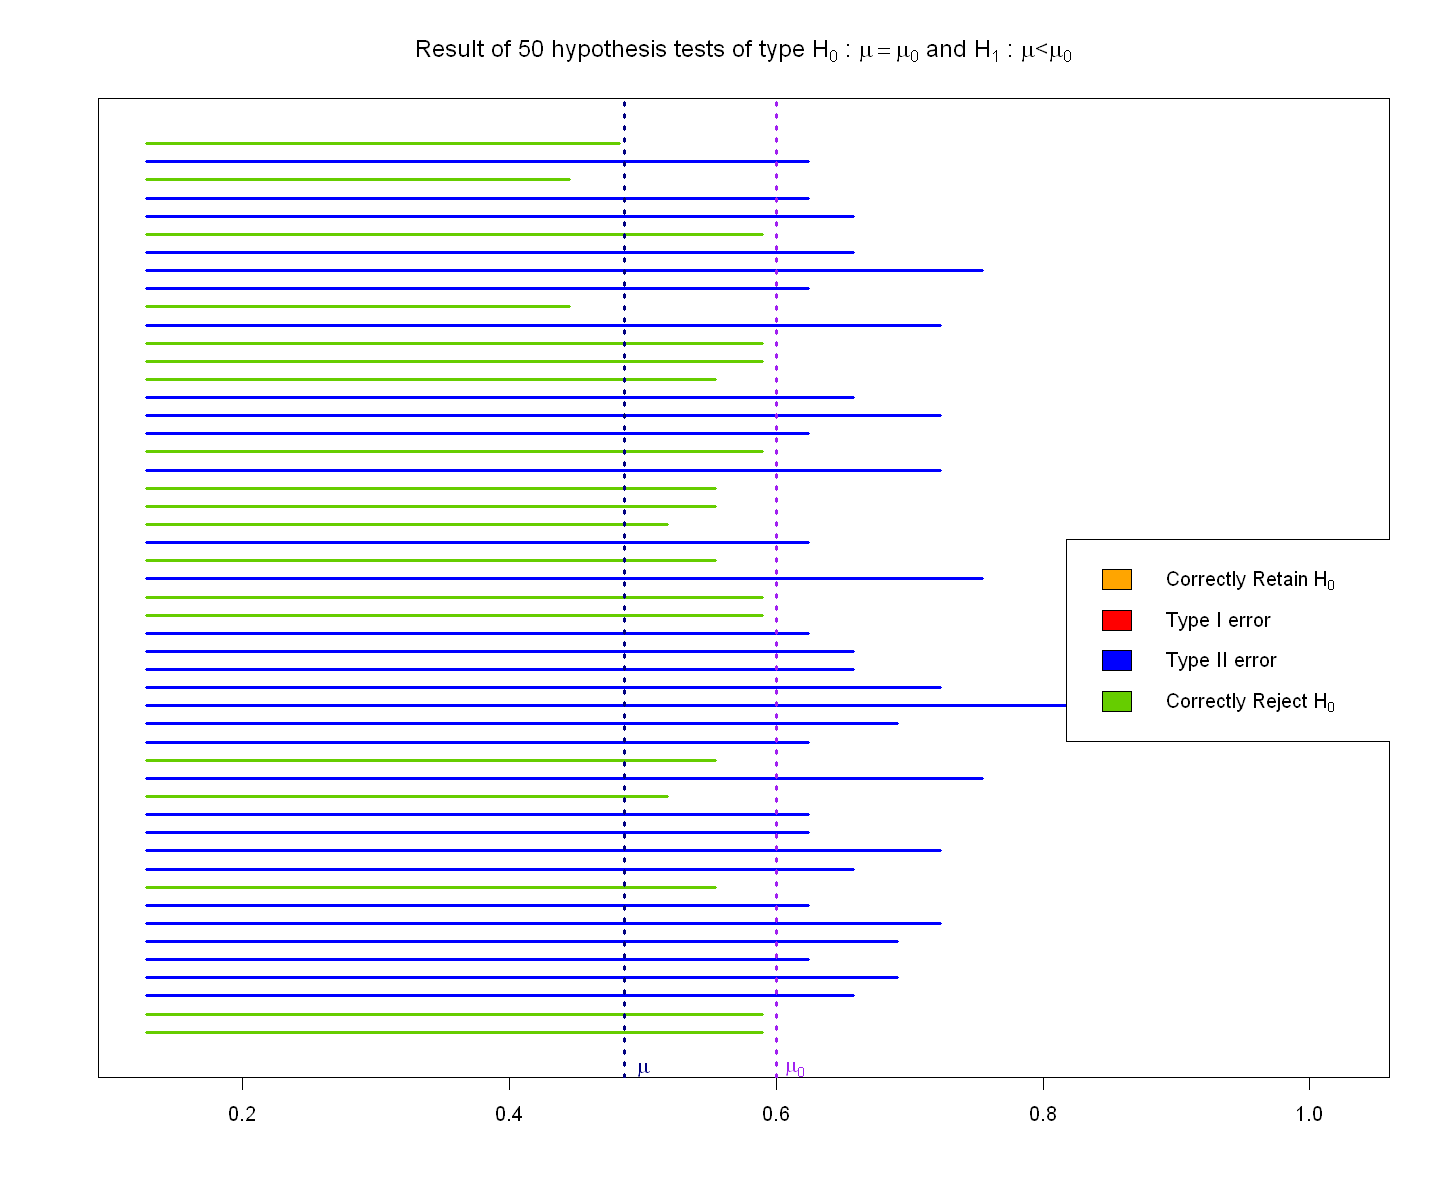

In [23]:
# info
# noquote(sprintf('theoretical confidence level  = %.2f', conf))
# noquote(sprintf('experimental confidence level = %.2f', sum(boo)/nreps))

options(repr.plot.width=12, repr.plot.height=10)
# plot the intervals
nplots <- 50

# set bounds and the title
max_from_mu <- max(intervals[1:nplots]) - mu
alt_hyp <- quote('H'[1]*' : '*mu*'<'*mu[0])

max_from_mu <- max(max_from_mu,abs(mu_0-mu))
xlims <- c(mu - max_from_mu, mu + 1.5*max_from_mu)
null_hyp <- quote('H'[0]*' : '*mu==mu[0])
title <- substitute("Result of "*nplots*" hypothesis tests of type "*nn*" and "*aa,list(nplots=nplots,nn=null_hyp,aa=alt_hyp))
colours <- c('orange','red','blue','chartreuse3')
plot(c(), xlim=xlims, ylim=c(0.5, nplots+0.5), yaxt='none', xlab='', ylab='', main=title)

for (rep in 1:nreps) {    
    lines(c(mu-max_from_mu,intervals[rep]), c(rep,rep), lwd=3, col=colours[test_outcomes[rep]])
}
abline(v=mu, lty=3, lwd=3, col='navyblue')
text(x=mu+.04*max_from_mu,y=-1,expression(mu), col='navyblue')
abline(v=mu_0, lty=3, lwd=3, col='purple')
text(x=mu_0+.04*max_from_mu,y=-1,expression(mu[0]), col='purple')


xleg <- .25*par("usr")[1] + .75*par("usr")[2]
yleg <- .45*par("usr")[3] + .55*par("usr")[4]
legend(x=xleg, y=yleg, c(quote("Correctly Retain H"[0]), "Type I error", "Type II error", quote("Correctly Reject H"[0])), fill=colours)

In [24]:
# results of acceptance tests suggests, since there are lots of type 2 error and mew0 was greater than mew we can assume that actual mean(population mean) might be more than the mean 

In [25]:
# Implement t-test directly
do_test <- function(pts, mu_null, alt='LTT', sig=0.05) {

    # set critical values (quantiles of the null distribution)
    cv_lower <- -Inf
    cv_upper <- Inf
    cv_upper <- qt(1-sig, df=npts-1)
    npts <- length(pts)
    xbar <- mean(pts)
    s <- sd(pts)
    xcv_lower <- xbar + cv_lower*s/sqrt(npts) # scale and shift
    xcv_upper <- xbar + cv_upper*s/sqrt(npts)
#     print(paste('Confidence interval for mu_true: [', xcv_lower, ',', xcv_upper, ']'))
    
    # make decision
    if (xcv_lower <= mu_null & mu_null <= xcv_upper) {
        return('Retain')
    } else {
        return('Reject')
    }    
}

In [26]:
# Monte Carlo estimate of significance level (false positive rate)

# Set parameters
npts <- 20       # sample size
mu_true <- mean(foods[,1])     # true mean
sigma_true <- sd(foods[,1])  # true stddev
alpha <- 0.05

# repeat
nreps <- 50 # change me
decisions <- character(nreps)
for (rep in 1:nreps) {

    # create sample
    pts <- rnorm(npts, mean=mu_true, sd=sigma_true)
    
    # test with mu_null = mu_true (i.e. H0 is true)
    decisions[rep] <- do_test(pts, mu_true, sig=alpha) 

}
# info
paste('False positive rate =', sum(decisions=='Reject')/nreps)

[1] "False positive rate = 0.06"

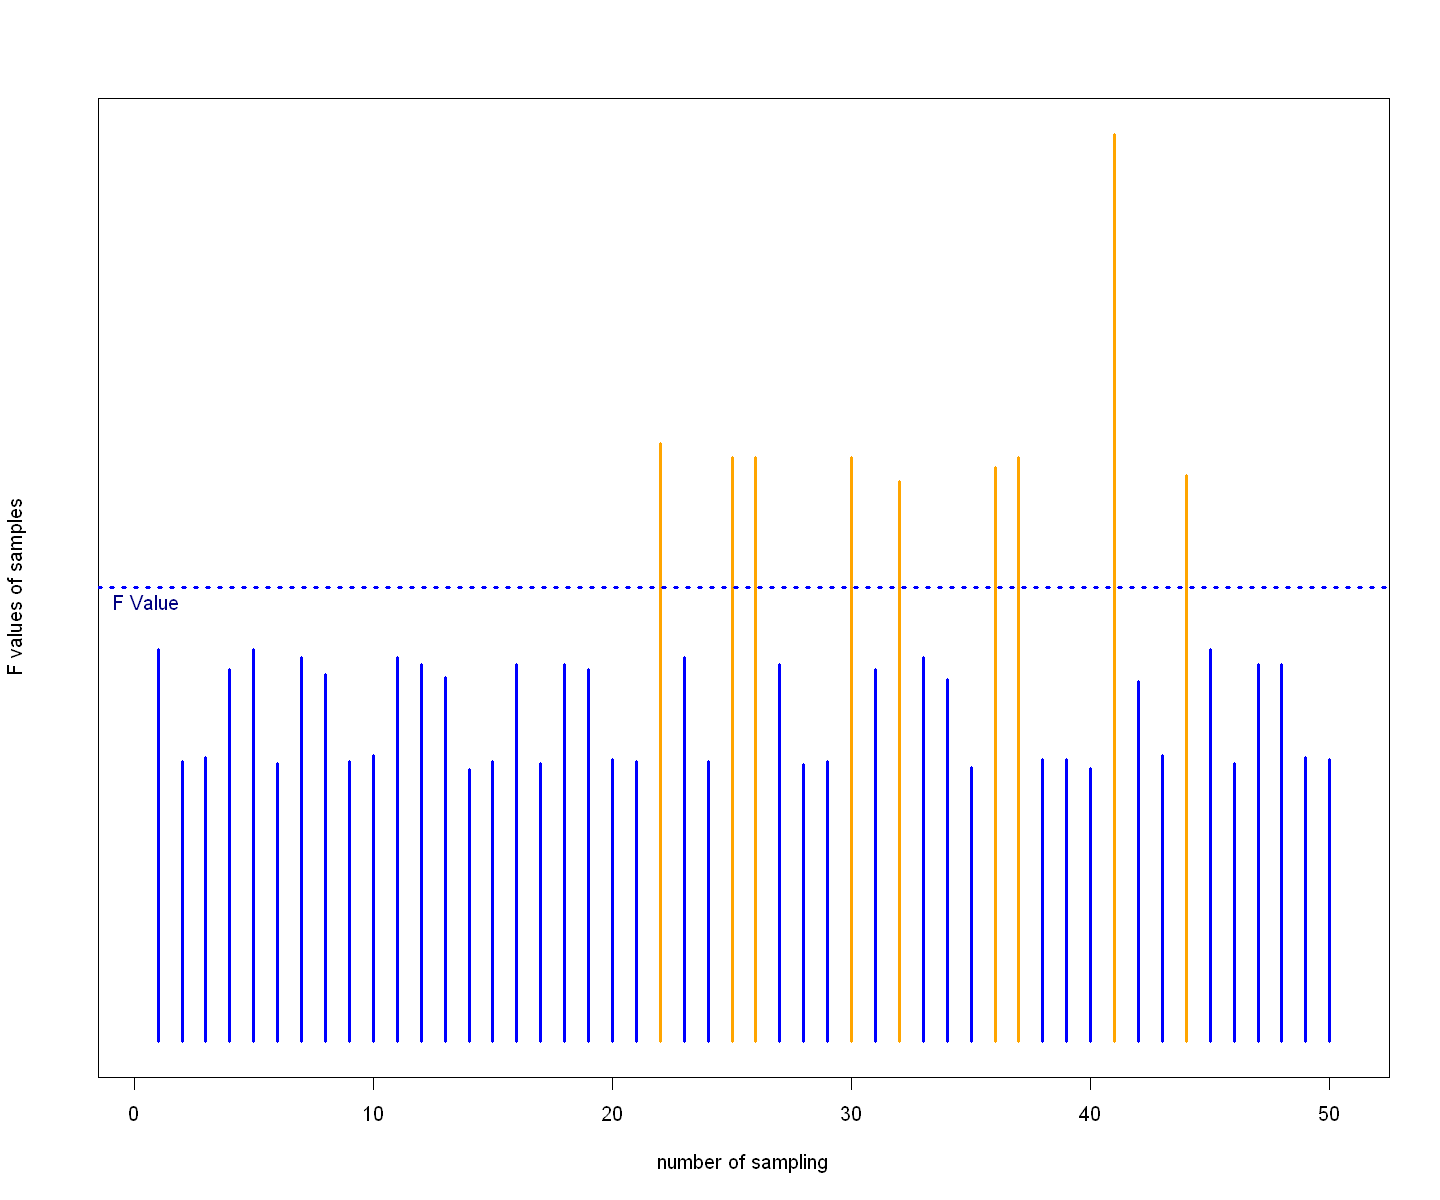

In [27]:
# stratification
strata <- data.frame(foods, hour_of_day=df$hour_of_day)

x <- length(df$hour_of_day)
eights <- round((length(strata$hour_of_day[strata$hour_of_day==8])/x)*30)
nines <- round((length(strata$hour_of_day[strata$hour_of_day==9])/x)*30)
tens <- round((length(strata$hour_of_day[strata$hour_of_day==10])/x)*30)

rows_8 <- strata[strata$hour_of_day==8,]
rows_9 <- strata[strata$hour_of_day==9,]
rows_10 <- strata[strata$hour_of_day==10,]

# perform one way anova tests of samples with cold_drink and hour_of_day are parameters
f_values <- c()
for (i in 1:50) {
    a = rows_8[sample(nrow(rows_8), size = eights),]
    b = rows_9[sample(nrow(rows_9), size = nines),]
    c = rows_10[sample(nrow(rows_10), size = tens),]
    stratified <- rbind(a,b,c)
    anova_results <- anova(aov(stratified[,1]~stratified[,6]))    
    f_values<-c(f_values,anova_results[["F value"]][1])
}
anova_results <- anova(aov(strata[,1]~strata[,6]))    
f_value<-anova_results[["F value"]][1]

nreps <- 50
max_f <- max(f_values)
xlims <- c(0, max_f+2)
plot(c(), xlim=c(0.5, nreps+0.5), ylim=c(-2,max_f), yaxt='none', xlab='number of sampling', ylab='F values of samples')
test_outcomes <- c(1:nreps)
for (rep in 1:nreps){
    test_outcomes[rep] <- 1+2*(f_values[rep] < f_value)
    lines(c(rep,rep), c(-2,f_values[rep]), lwd=3, col=colours[test_outcomes[rep]])    
}
abline(h=f_value, col="blue",lty=3, lwd= 3)
text(x=.5,y=-.1+f_value, "F Value", col='navyblue')

In [ ]:
# result of anova tests suggests that there is not enough evidence to reject the null hypothesis for those individual samples. 
# i.e means of hour_of_day values of hot_drinks are likely equal